In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scp

In [3]:
def logistic_growth(t, w, c, b):
    return c * w + b * w**2

# Parameters
c = 0.1   # Positive growth rate
b = -0.02 # Negative to ensure logistic growth, represents carrying capacity factor
w0 = 0.1  # Initial population

In [4]:
# Time span
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Solving the differential equation
solution = scp.solve_ivp(logistic_growth, t_span, [w0], args=(c, b), t_eval=t_eval)

# Extracting the results
t = solution.t
w = solution.y[0]

In [5]:
dw_dt = logistic_growth(t, w, c, b)

In [6]:
# Finding the inflection point
# The inflection happens when the second derivitive changes sign, shown way below
w_inflection = -c / (2 * b)
inflection_index = np.argmin(np.abs(w - w_inflection))
t_inflection = t[inflection_index]
w_inflection = w[inflection_index]

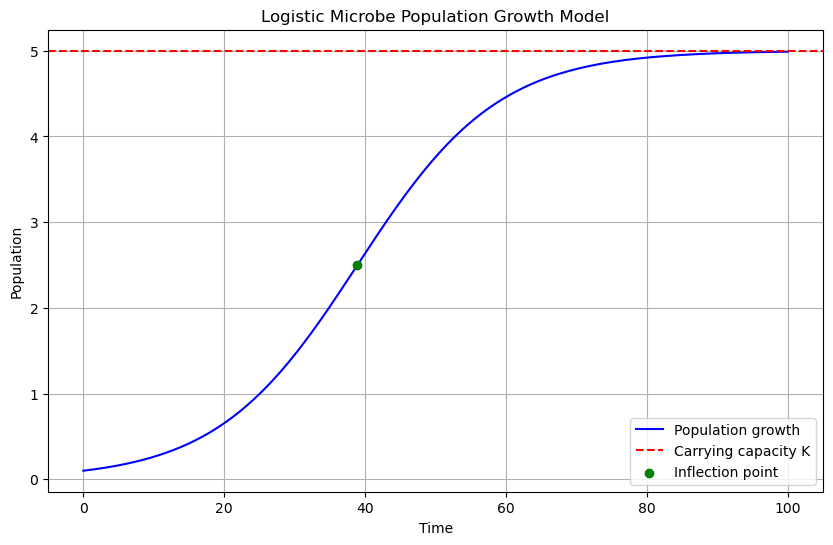

In [7]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, w, label='Population growth', color='b')
# This is the carrying capacity because it is the nonzero solution to the quadratic representing the growth rate:
# cw + bw^2 = 0, and the growth rate is only 0 at the carrying capacity and 0
plt.axhline(y=-c/b, color='r', linestyle='--', label='Carrying capacity K')
plt.scatter(t_inflection, w_inflection, color='g', zorder=5, label='Inflection point')
plt.title('Logistic Microbe Population Growth Model')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

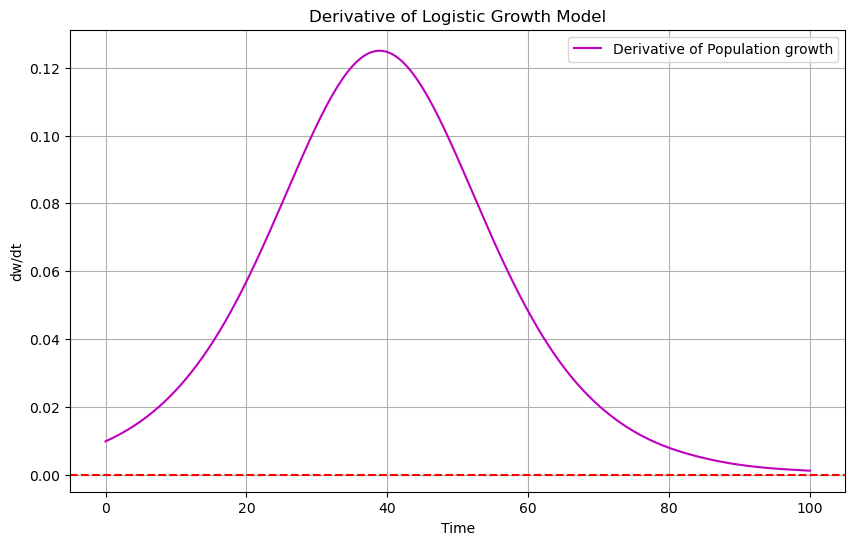

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(t, dw_dt, label='Derivative of Population growth', color='m')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Derivative of Logistic Growth Model')
plt.xlabel('Time')
plt.ylabel('dw/dt')
plt.legend()
plt.grid(True)
plt.show()